In [1]:
from collections import defaultdict

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

from scipy import spatial
import timeit
from sklearn.metrics import mean_squared_error

In [86]:
X_train = pd.read_csv("../feature/X_train.csv")
y_train = pd.read_csv("../feature/y_train.csv")

X_val   = pd.read_csv("../feature/X_val.csv")
y_val   = pd.read_csv("../feature/y_val.csv")

print(X_train.shape, '\n')
# print(X_train.columns)

print(X_val.shape, '\n')
# print(X_val.columns)

(150232, 59) 

(50077, 59) 



In [87]:
# here we decide to merge them intoa large "training set"
X_train = pd.concat([X_train, X_val], ignore_index=True)
y_train = pd.concat([y_train, y_val], ignore_index=True)

print(X_train.shape, '\n')
print(X_train.columns)

(200309, 59) 

Index(['user_id', 'business_id', 'average_stars', 'compliment_cool',
       'compliment_cute', 'compliment_funny', 'compliment_hot',
       'compliment_list', 'compliment_more', 'compliment_note',
       'compliment_photos', 'compliment_plain', 'compliment_profile',
       'compliment_writer', 'cool', 'fans', 'funny', 'review_count_x',
       'useful', 'date_since', 'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_BYOB',
       'attributes_BikeParking', 'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 'attributes_ByAppointmentOnly',
       'attributes_Caters', 'attributes_CoatCheck', 'attributes_Corkage',
       'attributes_DogsAllowed', 'attributes_DriveThru',
       'attributes_GoodForDancing', 'attributes_GoodForKids',
       'attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
       'attributes_Open24Hours', 'attributes_OutdoorSeating',
       'attributes_Restaurants

In [88]:
pd.options.display.max_columns = X_train.shape[1]
X_train.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count_x,useful,date_since,attributes_AcceptsInsurance,attributes_AgesAllowed,attributes_Alcohol,attributes_BYOB,attributes_BikeParking,attributes_BusinessAcceptsBitcoin,attributes_BusinessAcceptsCreditCards,attributes_ByAppointmentOnly,attributes_Caters,attributes_CoatCheck,attributes_Corkage,attributes_DogsAllowed,attributes_DriveThru,attributes_GoodForDancing,attributes_GoodForKids,attributes_HappyHour,attributes_HasTV,attributes_NoiseLevel,attributes_Open24Hours,attributes_OutdoorSeating,attributes_RestaurantsAttire,attributes_RestaurantsCounterService,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,attributes_RestaurantsTableService,attributes_RestaurantsTakeOut,attributes_Smoking,attributes_WheelchairAccessible,attributes_WiFi,is_open,review_count_y,stars,state,cate_Restaurants,cate_Entertainment,cate_Travel,city
count,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.0,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.000000,200309.0,200309.000000,200309.000000,200309.000000,200309.000000
mean,3.769307,151.180915,7.987080,151.180915,103.724581,4.880869,11.634595,64.495155,66.751199,157.246574,10.326146,58.673509,824.052309,43.457613,581.545872,382.632303,920.117294,2011.180017,-0.991783,0.008327,0.901637,3.0,0.609828,-0.844855,0.878523,-0.902835,0.220105,-0.773150,-0.911522,-0.667339,-0.917183,-0.763785,0.480293,-0.621784,0.283013,1.019175,-0.960321,0.259749,0.503697,-0.935984,-0.086631,0.563484,1.724051,0.205258,0.380717,0.565941,2.660724,0.485285,0.860855,0.885971,593.868673,3.794587,17.0,0.788966,0.083152,0.048575,3.758783
std,0.495670,615.716966,89.724416,615.716966,605.453620,49.664578,65.880209,227.969166,503.014284,596.158442,96.996649,239.178322,4293.616933,104.497764,3346.202501,691.778723,4230.574842,2.423148,0.114813,0.090873,0.914367,0.0,0.665397,0.368007,0.452416,0.336267,0.734903,0.474335,0.343980,0.615968,0.307620,0.481061,0.743133,0.754887,0.775122,1.618050,0.206392,0.744012,0.843189,0.323573,0.562744,0.800545,0.967645,0.762858,0.837976,0.771443,0.796591,0.844116,1.015451,0.317847,866.988719,0.556216,0.0,0.408105,0.276202,0.215094,5.122888
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,-1.000000,0.000000,0.000000,3.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,100.000000,1.000000,17.0,-1.000000,-1.000000,-1.000000,0.000000
25%,3.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,49.000000,5.000000,2009.000000,-1.000000,0.000000,0.000000,3.0,0.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0

In [89]:
biz_cols = [
       'business_id', 
       'is_open',
       'stars', ## different?
       'review_count_y', ## different
    
       'city',
       'state',
       
       'cate_Restaurants',
       'cate_Entertainment',
       'cate_Travel',
    
       'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 
       'attributes_Alcohol',
       'attributes_BYOB',
       'attributes_BikeParking', 
       'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 
       'attributes_ByAppointmentOnly', 
       'attributes_Caters',
       'attributes_CoatCheck', 
       'attributes_Corkage',
       'attributes_DogsAllowed',
       'attributes_DriveThru', 
       'attributes_GoodForDancing',
       'attributes_GoodForKids', 
       'attributes_HappyHour',
       'attributes_HasTV',  
       'attributes_NoiseLevel',
       'attributes_Open24Hours', 
       'attributes_OutdoorSeating',
       'attributes_RestaurantsAttire', 
       'attributes_RestaurantsCounterService',
       'attributes_RestaurantsDelivery',
       'attributes_RestaurantsGoodForGroups',
       'attributes_RestaurantsPriceRange2',
       'attributes_RestaurantsReservations',
       'attributes_RestaurantsTableService', 
       'attributes_RestaurantsTakeOut',
       'attributes_Smoking', 
       'attributes_WheelchairAccessible',
       'attributes_WiFi'
       ]



In [90]:
# extract business info
business = X_train[biz_cols]

print(business.shape)
# business.head()

# drop duplicates
business = business.drop_duplicates()

print(business.shape)
# business.head()

pd.options.display.max_columns = business.shape[1]
business.describe()

(200309, 40)
(12031, 40)


,is_open,stars,review_count_y,city,state,cate_Restaurants,cate_Entertainment,cate_Travel,attributes_AcceptsInsurance,attributes_AgesAllowed,attributes_Alcohol,attributes_BYOB,attributes_BikeParking,attributes_BusinessAcceptsBitcoin,attributes_BusinessAcceptsCreditCards,attributes_ByAppointmentOnly,attributes_Caters,attributes_CoatCheck,attributes_Corkage,attributes_DogsAllowed,attributes_DriveThru,attributes_GoodForDancing,attributes_GoodForKids,attributes_HappyHour,attributes_HasTV,attributes_NoiseLevel,attributes_Open24Hours,attributes_OutdoorSeating,attributes_RestaurantsAttire,attributes_RestaurantsCounterService,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,attributes_RestaurantsTableService,attributes_RestaurantsTakeOut,attributes_Smoking,attributes_WheelchairAccessible,attributes_WiFi
count,12031.000000,12031.000000,12031.000000,12031.000000,12031.0,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.0,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000
mean,0.889203,3.782271,267.265148,5.031918,17.0,0.742249,0.052282,0.033580,-0.980218,0.004987,1.040063,3.0,0.609343,-0.846563,0.879561,-0.859696,0.186019,-0.803757,-0.957360,-0.706758,-0.916549,-0.793367,0.405369,-0.661375,0.207630,1.205802,-0.982046,0.186352,0.578589,-0.967334,-0.113706,0.466379,1.556728,0.121021,0.281190,0.507522,2.696451,0.363976,0.996509
std,0.313894,0.628494,324.927672,5.766024,0.0,0.437604,0.222977,0.180614,0.176154,0.070446,0.924709,0.0,0.692311,0.369533,0.450038,0.424633,0.782375,0.442699,0.242103,0.582756,0.313749,0.451681,0.813539,0.725640,0.810639,1.709599,0.140691,0.775680,0.888901,0.235672,0.611911,0.860037,1.041493,0.784397,0.867906,0.825562,0.773922,0.900408,1.121314
min,0.000000,1.000000,100.000000,0.000000,17.0,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,3.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,1.000000,3.500000,127.000000,0.000000,17.0,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.0,0.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,3.000000,-1.000000,0.000000
50%,1.000000,4.000000,174.000000,3.000000,17.0,1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,3.0,1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,4.000000,282.000000,8.000000,17.0,1.000000,0.000000,0.000000,-1.000000,0.000000,2.000000,3.0,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,3.000000,-1.000000,1.000000,2.000000,-1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,1.000000,5.000000,7968.000000,17.000000,17.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000


In [91]:
print(business.index)
# reset the indices of business
# for convenience of indexing in biz_sim_mat
business = business.reset_index(drop=True)
print(business.index)

Int64Index([     0,     11,     18,     78,    182,    187,    216,    233,
               249,    300,
            ...
            200164, 200178, 200180, 200198, 200209, 200230, 200242, 200276,
            200279, 200308],
           dtype='int64', length=12031)
RangeIndex(start=0, stop=12031, step=1)


In [92]:
# for fast accessing index (number) given id (string)... in user
# business.index[business["business_id"] == business_id] is slow
n_biz = business.shape[0]
biz_id_index_dict = {business.loc[index, 'business_id']: index for index in range(n_biz)}

len(biz_id_index_dict) == business.shape[0]

True

In [93]:
biz_attrs = [
       'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 
       'attributes_Alcohol',
       'attributes_BYOB',
       'attributes_BikeParking', 
       'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 
       'attributes_ByAppointmentOnly', 
       'attributes_Caters',
       'attributes_CoatCheck', 
       'attributes_Corkage',
       'attributes_DogsAllowed',
       'attributes_DriveThru', 
       'attributes_GoodForDancing',
       'attributes_GoodForKids', 
       'attributes_HappyHour',
       'attributes_HasTV',  
       'attributes_NoiseLevel',
       'attributes_Open24Hours', 
       'attributes_OutdoorSeating',
       'attributes_RestaurantsAttire', 
       'attributes_RestaurantsCounterService',
       'attributes_RestaurantsDelivery',
       'attributes_RestaurantsGoodForGroups',
       'attributes_RestaurantsPriceRange2',
       'attributes_RestaurantsReservations',
       'attributes_RestaurantsTableService', 
       'attributes_RestaurantsTakeOut',
       'attributes_Smoking', 
       'attributes_WheelchairAccessible',
       'attributes_WiFi'
       ];
      
n_biz_attrs = len(biz_attrs)
print(n_biz_attrs)

31


In [94]:
# (minmax) normalize values of attributes 
business[biz_attrs] = business[biz_attrs].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if np.max(x) != np.min(x) else 0.0)

print(business.shape)
# business.head()

pd.options.display.max_columns = business.shape[1]
business.describe()

(12031, 40)


,is_open,stars,review_count_y,city,state,cate_Restaurants,cate_Entertainment,cate_Travel,attributes_AcceptsInsurance,attributes_AgesAllowed,attributes_Alcohol,attributes_BYOB,attributes_BikeParking,attributes_BusinessAcceptsBitcoin,attributes_BusinessAcceptsCreditCards,attributes_ByAppointmentOnly,attributes_Caters,attributes_CoatCheck,attributes_Corkage,attributes_DogsAllowed,attributes_DriveThru,attributes_GoodForDancing,attributes_GoodForKids,attributes_HappyHour,attributes_HasTV,attributes_NoiseLevel,attributes_Open24Hours,attributes_OutdoorSeating,attributes_RestaurantsAttire,attributes_RestaurantsCounterService,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,attributes_RestaurantsTableService,attributes_RestaurantsTakeOut,attributes_Smoking,attributes_WheelchairAccessible,attributes_WiFi
count,12031.000000,12031.000000,12031.000000,12031.000000,12031.0,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.0,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.00000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000,12031.000000
mean,0.889203,3.782271,267.265148,5.031918,17.0,0.742249,0.052282,0.033580,0.009891,0.004987,0.520032,0.0,0.804671,0.076718,0.939781,0.070152,0.593010,0.098122,0.021320,0.146621,0.041726,0.103316,0.702685,0.169313,0.603815,0.30145,0.008977,0.593176,0.289294,0.016333,0.443147,0.733189,0.511346,0.560510,0.640595,0.753761,0.898817,0.681988,0.332170
std,0.313894,0.628494,324.927672,5.766024,0.0,0.437604,0.222977,0.180614,0.088077,0.070446,0.462354,0.0,0.346155,0.184767,0.225019,0.212316,0.391187,0.221350,0.121052,0.291378,0.156875,0.225841,0.406770,0.362820,0.405319,0.42740,0.070346,0.387840,0.444451,0.117836,0.305955,0.430018,0.208299,0.392198,0.433953,0.412781,0.257974,0.450204,0.373771
min,0.000000,1.000000,100.000000,0.000000,17.0,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.500000,127.000000,0.000000,17.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.00000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.400000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
50%,1.000000,4.000000,174.000000,3.000000,17.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.00000,0.000000,0.500000,0.000000,0.000000,0.500000,1.000000,0.600000,0.500000,1.000000,1.000000,1.000000,1.000000,0.333333
75%,1.000000,4.000000,282.000000,8.000000,17.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.75000,0.000000,1.000000,1.000000,0.000000,0.500000,1.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333
max,1.000000,5.000000,7968.000000,17.000000,17.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
biz_attr_val = business[biz_attrs].values
biz_attr_val.shape

(12031, 31)

In [96]:
# alternative way: 
# just calculate similarity of 2 businesses when needed
# instead of computing & then stroing similarities of all possible pairs in a matrix
def calculate_similarity(biz_1_index, biz_2_index):
    # thanks to statement "business = business.reset_index(drop=True)" (???)
    # usually default (consecutive) indices works
    l_1, l_2 = biz_attr_val[biz_1_index], biz_attr_val[biz_2_index]
    
    # any other similarity measure?
    # how to reflect the influence of review numbers for a business
    sim = 1 - spatial.distance.cosine(l_1, l_2)
    return sim

In [97]:
user_cols = [
    'user_id',
    'average_stars', 
    'compliment_cool', 
    'compliment_cute',
    'compliment_funny', 
    'compliment_hot', 
    'compliment_list',
    'compliment_more', 
    'compliment_note', 
    'compliment_photos',
    'compliment_plain', 
    'compliment_profile', 
    'compliment_writer', 
    'cool',
    'fans', 
    'funny', 
    'review_count_x', ##different
    'useful',
    'date_since'
]


In [98]:
user = X_train[user_cols]

print(user.shape)
# user.head()

# drop duplicates
user = user.drop_duplicates()

print(user.shape)
# user.head()

pd.options.display.max_columns = user.shape[1]
user.describe()

(200309, 19)
(25379, 19)


,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count_x,useful,date_since
count,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000,25379.000000
mean,3.775096,15.678474,0.855707,15.678474,11.503172,0.375192,1.316246,6.667126,6.049844,15.054179,0.969424,5.580677,87.394854,5.182434,65.141377,62.718783,116.835927,2012.566177
std,0.836327,213.701942,19.980114,213.701942,198.775048,9.803164,16.381394,73.807609,140.277629,202.918069,22.188998,71.449123,1245.669527,29.014671,962.360914,184.137198,1332.138821,2.550473
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000
25%,3.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2011.000000
50%,3.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,2013.000000
75%,4.310000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,48.000000,12.000000,2015.000000
max,5.000000,12478.000000,2250.000000,12478.000000,19085.000000,1305.000000,1440.000000,4659.000000,10820.000000,13075.000000,2327.000000,4352.000000,67566.000000,1593.000000,65804.000000,11942.000000,68448.000000,2018.000000


In [99]:
print(user.index)
# reset the indices of business
# for convenience of indexing in biz_sim_mat
user = user.reset_index(drop=True)
print(user.index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            200295, 200296, 200297, 200298, 200299, 200302, 200303, 200306,
            200307, 200308],
           dtype='int64', length=25379)
RangeIndex(start=0, stop=25379, step=1)


In [100]:
# for fast accessing index (number) given id (string)... in user
# user.index[user["user_id"] == user_id] is slow
n_user = user.shape[0]
user_id_index_dict = {user.loc[index, 'user_id']: index for index in range(n_user)}

len(user_id_index_dict) == user.shape[0]

True

In [101]:
# for fast accessing... in review (X_train)
n_review = X_train.shape[0]
review_uid_rindices_dict = {}
review_uid_bids_dict = {}
# https://stackoverflow.com/questions/483666/python-reverse-invert-a-mapping
for r_index in range(n_review):
    r = X_train.iloc[r_index]
    user_id = r['user_id']
    business_id = r['business_id']
    review_uid_rindices_dict.setdefault(user_id, []).append(r_index)
    review_uid_bids_dict.setdefault(user_id, []).append(business_id)
    
print(len(review_uid_rindices_dict), len(review_uid_bids_dict))


25379 25379


In [102]:
# and more...
n_biz = business.shape[0]
biz_id_star_dict = {business.loc[index, 'business_id']: business.loc[index, 'stars'] for index in range(n_biz)}
print(len(biz_id_star_dict))

n_user = user.shape[0]
user_id_star_dict = {user.loc[index, 'user_id']: user.loc[index, 'average_stars'] for index in range(n_user)}
print(len(user_id_star_dict))

12031
25379


In [138]:
all_user = pd.read_csv("../data/users.csv")
all_business = pd.read_csv("../data/business.csv")

In [139]:
au_cols = [
    'user_id',
    'average_stars',
    'review_count',
    'friends'
] 

In [140]:
all_user = all_user[au_cols]
all_user.head()

,user_id,average_stars,review_count,friends
0,UxfpKHGO2dfQCdS9xLLJow,2.83,6,None
1,Kr5NDQFPPB_01-5CDmSqVg,3.00,4,None
2,wfoeMtriLwZsdRzcxNTaFA,3.09,10,None
3,aXb0kCIsIbPEEUSGomrrmA,4.00,4,None
4,sLrX2KGu3lc_JczAnsg0_Q,4.00,1,None


In [163]:
all_business_info_dict = {}
for i in range(all_business.shape[0]):
    m = all_business.iloc[i]
    
    business_id  = m['business_id']
    stars        = m['stars']
    review_count = m['review_count']
    
    all_business_info_dict[business_id] = {'stars': stars, 'review_count': review_count}

In [141]:
all_user_info_dict = {}
for i in range(all_user.shape[0]):
    u = all_user.iloc[i]
    
    user_id = u['user_id']
    average_stars = u['average_stars']
    review_count = u['review_count']
    friends = u['friends'].split(', ')
    
    all_user_info_dict[user_id] = {'average_stars': average_stars, 'review_count': review_count, 'friends': friends}
    

In [142]:
len(all_user_info_dict)

41720

In [109]:
i, count = 0, 0
ls = []

for k, v in all_user_info_dict.items():
#      if k in user_id_index_dict:
#         print(1)
    for f in v['friends']:
        flag = 0
        if f in user_id_index_dict:
            flag += 1
    if (flag != 0):
        count += 1
        ls.append((k, flag))
        print(k, flag)

print(count)

FadewNTxVINfAxou0FoAyg 1
NXMI-lOp9QuoS0CIlyQ-tg 1
50YW63KoSXZIvB2Ns4kZYg 1
z1lhZkkGp0I__lrYfte66A 1
aFVTC_Alj4rPP8A2kOhM9Q 1
jVswY61Em-fG-wEpk0Vb8Q 1
JuUjVzgkwkUjJDusOdPP-Q 1
hOTApEh6skRLReKjrtFjIQ 1
s1RldbGZc-oPjhYBinLtPA 1
8VGq29JXYyRNxvHwAkSO6g 1
7CJI0GgiomBDIxx49GoZnw 1
atpbezxYFeyBEnBAvu0eEQ 1
J7SzbwMEMeS8ARGG5bR3jg 1
AUWrpboMltugoxnAOD9xEw 1
4KAEacDydkpuR_lFIk6-9w 1
zL_-ibUR10nkcyM0W924Yg 1
OzeQvegfustYqr0q_zFKVg 1
faf0tpradGmyNSLlwaM43Q 1
m7TUDkHmovWSgVdaqU-bFw 1
oDp9ea3HEkkhgkve1LmeiQ 1
6bESinqNWjgmiSdQYpaIlA 1
1MSV_Nq25SPmDx7oOiLMBw 1
QL-6OIKawqg79VncJqUyMw 1
ij7yjnJXFG5ARbEGzX7a_Q 1
evuzduRQsazGU4kf5JN60A 1
Ymp3Q5aFPKM1NEEfayO39Q 1
57aOFTy0NLDb7Ggtri-Pxw 1
7mw_2HRE5HJLpHwnF6YPgg 1
i7mxtzjyo3BOEhfvJ22qqQ 1
95uPp5xYVp0eFMrevpYxHw 1
3veFPGLWvvEgzD2ut7rFFA 1
o0OBrWkbj6TnkCiNHLbWTw 1
jLMFA7sRxnnmfCuL-8L0MA 1
7UOGJUyi33IgURfRawe1Yw 1
9MYpCweS2KHY1hWzjTy0Yw 1
fHm_nNnSc8knFqXFh_m7bg 1
eippWaD0XyDlmAOUJ9ch1Q 1
Bh_YL2l5zvej447qEMn11A 1
XkKeHtCwK_j2mjSBaqqktA 1
gbBIRG-s9wOw_tQojvEkSQ 1


In [162]:
#1
# Y_bar      = y_train['stars'].mean()
# Y_user_bar = user['average_stars'].mean()
# Y_biz_bar  = business['stars'].mean()
# print(Y_bar, Y_user_bar, Y_biz_bar)

#2
Y_bar      = y_train['stars'].mean()
Y_user_bar = all_user['average_stars'].mean()
Y_biz_bar  = all_business['stars'].mean()
print(Y_bar, Y_user_bar, Y_biz_bar)

3.7908481396242806 3.744321668264621 3.7830071321943937


In [177]:
# # ver 1
# def pred_baseline(user_id, business_id):
# # credit to henryachen 
# # https://gist.github.com/henryachen/a5fb0281c1715e83aaef
#     pred = Y_bar

#     try:
#         user_index = user_id_index_dict[user_id]
#         #print('--0: ', user_index)
        
#         u = user.loc[[user_index],:]# user[user.index == user_index]
#         #print('--1: ', type(u))
#         pred += u['average_stars'].values[0] - Y_user_bar
#         #print('--2: ', u['average_stars'].values[0])
#     except:
#         pred += 0
    
#     try:
#         business_index = biz_id_index_dict[business_id]
#         #print('--0: ', business_index)
#         m = business.loc[[business_index],:]
#         #print('--1: ', type(m))
#         pred += m['stars'].values[0]         - Y_biz_bar
#         #print('--2: ', m['stars'].values[0])
#     except:
#         pred += 0
        
#     return pred

# ver 2
# without using df.loc() to query pandas dataframes (user and business here)
def pred_baseline(user_id, business_id):
# credit to henryachen 
# https://gist.github.com/henryachen/a5fb0281c1715e83aaef
    pred = Y_bar

    try:        
        #pred += user_id_star_dict[user_id] - Y_user_bar
        pred += all_user_info_dict[user_id]['average_stars'] - Y_user_bar
    except:
        pred += 0
    
    try:
        #pred += biz_id_star_dict[business_id] - Y_biz_bar
        pred += all_business_info_dict[business_id]['stars'] - Y_biz_bar
    except:
        pred += 0
        
    return pred

In [178]:
print('Example 0: \n')
print('real:     ', y_train.loc[0, 'stars'], '\n')
print('baseline: ', pred_baseline(X_train.loc[0, 'user_id'], X_train.loc[0, 'business_id']), '\n')


Example 0: 

real:      4.0 

baseline:  4.763519339165265 



In [169]:
def pred_more(user_id, business_id, ps_ratio=1):
# credit to henryachen 
# https://gist.github.com/henryachen/a5fb0281c1715e83aaef
#     pred_base = pred_baseline(user_id, business_id)
    
#     q = X_train[X_train['user_id'] == user_id] # query X_train, not user
#     # note the differences
#     biz_ids          = q['business_id'].values.tolist()
#     review_indices = q.index.values.tolist() # review index in y_train, not biz index in business
    try:
        review_indices = review_uid_rindices_dict[user_id]
        biz_ids = review_uid_bids_dict[user_id]
        sz = len(biz_ids)
    except:
        return 0 
    
    # business_index_TEMP = business.index[business["business_id"] == business_id] # might be not found
    try: 
        business_index = biz_id_index_dict[business_id]
    except:
        return 0 
    
#     if sz == 0 or business_index_TEMP.shape[0] == 0: # two conditions
#         return pred_base
#     else:

    # weighted average
    den, num = 0, 0
    for i in range(sz):
        #
        biz_id = biz_ids[i]
        # biz_index  = business.index[business["business_id"] == biz_id].values[0]
        try:
            biz_index  = biz_id_index_dict[biz_id]
        except:
            continue # for for-loop?
        #
        review_index = review_indices[i]
        Y_user_biz = y_train.loc[review_index, 'stars']
        #
        # sim = biz_sim_mat[business_index, biz_index]
        sim = calculate_similarity(business_index, biz_index)
        pb = pred_baseline(user_id, biz_id)
        den += sim
        num += sim * (Y_user_biz - pb)
            
    if den != 0:
        return num / den
    else:
        return 0

In [179]:
print('Example 0')
print('real:     ', y_train.loc[0, 'stars'])
print('baseline: ', pred_baseline(X_train.loc[0, 'user_id'], X_train.loc[0, 'business_id']))
print('more:     ', pred_more(X_train.loc[0, 'user_id'], X_train.loc[0, 'business_id']))

Example 0
real:      4.0
baseline:  4.763519339165265
more:      -1.486828979781053


In [171]:
validation = pd.read_csv("../data/validate_queries.csv")

X_val = validation[["user_id","business_id"]] # pandas dataframe
y_val = validation["stars"].values # numpy array

In [180]:
print('Example 0')
print('baseline: ', pred_baseline(X_val.loc[0, 'user_id'], X_val.loc[0, 'business_id']))
print('more:     ', pred_more(X_val.loc[0, 'user_id'], X_val.loc[0, 'business_id']))

Example 0
baseline:  2.8935193391652656
more:      -0.8935193391652656


In [173]:
# runs about 2 hours (for 50,000 samples)...
# seems very slow...
# need better methods...

# after querying dict instead of pandas dataframe
# it becomes better

def run_test(X, f):
    sz = X.shape[0]
    y_pd = np.zeros(sz)

    for i in range(sz):
        if i % 1000 == 0:
           print(i) 
        q = X.iloc[i]
        p = f(q['user_id'], q['business_id'])
        y_pd[i] = p

    plt.hist(y_pd)
    return y_pd

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


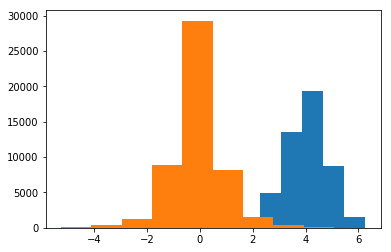

In [174]:
y_pd_base = run_test(X_val, pred_baseline)
y_pd_more = run_test(X_val, pred_more)

good choice: ratio is  0.15 , val rmse is  1.1434682359138035


Text(0,0.5,'val rmse')

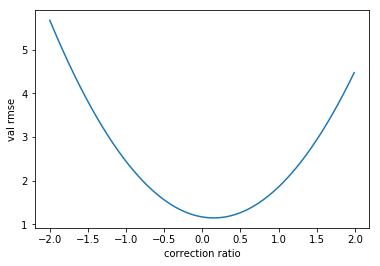

In [176]:
sz = 100
rl, el = [], []

for r in range(-2*sz, 2*sz):
    y_pd = [y_pd_base[i] + r/sz * y_pd_more[i] for i in range(len(y_pd_base))]
    rl.append(r/sz)
    el.append(mean_squared_error(y_pd, y_val))
    
min_idx = np.argsort(el)[0]
print('good choice: ratio is ', rl[min_idx], ', val rmse is ', el[min_idx])
    
plt.plot(rl, el)
plt.xlabel('correction ratio')
plt.ylabel('val rmse')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


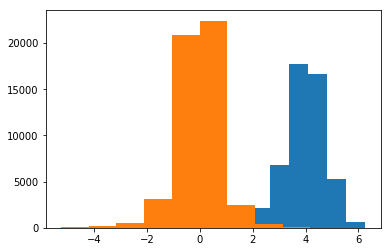

In [154]:
X_test = pd.read_csv("../data/test_queries.csv")

y_pd_base = run_test(X_test, pred_baseline)
y_pd_more = run_test(X_test, pred_more)

ratio = 0.15
y_pd = [y_pd_base[i] + ratio * y_pd_more[i] for i in range(len(y_pd_base))]

In [136]:
df = pd.DataFrame(y_pd, columns = {'stars'})

In [137]:
df.to_csv("./X_test_output.csv", index_label='index')